# Part 13 of Recipes: Copy Number Data

This page is primarily based on the following page at the Circos documentation site:



- [13. Copy Number Data](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 12 by clicking [here &#8592;](Recipes_Part12.ipynb).



----



8 --- Recipes
=============

13. Copy Number Data
--------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/copy_number_data/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/copy_number_data/images){.normal}
[Configuration](/documentation/tutorials/recipes/copy_number_data/configuration){.normal}
:::

Copy number values, such as those collected from microarray or
clone-based hybridization experiments, are typically drawn as scatter
plots. In this tutorial, I\'ll show how CNV values can be drawn with
Circos.

We\'ll assume that the CNV data exists for various points in the genome,
formatted for a scatter plot

```ini
...
hs1 30200000 32400000 0.798258
hs1 32400000 34600000 0.0495811
hs1 34600000 40100000 -2.46056
hs1 40100000 44100000 1.40846
hs1 44100000 46800000 -2.35913
...
```


If you are using very dense microarrays, the number of individual values
can exceed 100,000. In this case, you should window the data to reduce
the number of points.

Individual probes may have single base positions, such as

```ini
hs1 3021532 3021532 0.798258
```


but when using clone-based hybridization, or a windowed data set, a
single CNV value is associated with a range

```ini
hs1 30200000 32400000 0.798258
```


In this case, keep the input data intervals as a range. Although a
scatter plot glyph is always placed in the center of the range (and
therefore the output is indistinguishable from a data set in which the
range is the midpoint), if you choose to draw the data as a histogram,
bin width will be based on the range size. In addition, you have access
to the range sizes in the rules block, if you need them.

For this tutorial, I\'ve generated random CNV values, in the range
\[-3,3\].

### defining scatter plots

We\'ll want to have a different background for the positive and negative
CNV values. To do so, you\'ll need to define two separate scatter plot
tracks. You\'ll use the same input data for both, and distinguish them
by different min/max values.

The track for negative data will be positioned at 60-75% of the
circle\'s radius and show data in the range `[-3,0]`.

```ini
<plot>
type = scatter
file = data/8/13/data.cnv.txt
r0   = 0.6r
r1   = 0.75r
min  = -3
max  = 0
```


```ini
glyph      = circle
glyph_size = 8
color      = red
```


```ini
<axes>
<axis>
color     = lred
thickness = 2
spacing   = 0.1r
</axis>
</axes>
```


```ini
<backgrounds>
<background>
color = vlred_a5
</background>
</backgrounds>
```


```ini
...
```


The track for positive values is defined analogously, except that `r0`,
`r1`, `min`, `max` are different, as are the axis and background colors.

```ini
<plot>
type = scatter
file = data/8/13/data.cnv.txt
r0   = 0.75r
r1   = 0.9r
min  = 0
max  = 3
glyph = circle
glyph_size = 8
color = green
```


```ini
<axes>
<axis>
color     = lgreen
thickness = 2
spacing   = 0.1r
</axis>
</axes>
```


```ini
<backgrounds>
<background>
color = vlgreen_a5
</background>
</backgrounds>
```


```ini
...
```


### adjusting glyph sizes

Rules are used to dynamically adjust features of the figure based on
data values. In this example, I\'ll modify both the size and the outline
of the glyphs. The size will be proportional to the absolute value, and
for extremely large (or small) values, we\'ll put a black outline around
the glyphs.

```ini
<rules>
```


```ini
# change the glyph_size for each point using formula 6+4*abs(cnv)
<rule>
importance = 100
condition  = 1
glyph_size = eval( 6 + 4*abs(var(value)) )
flow       = continue
</rule>
```


```ini
# if the value is >2, add a black outline
<rule>
importance = 90
condition  = var(value) > 2
stroke_color = black
stroke_thickness = 2
</rule>
```


```ini
</rules>
```


### creating a heat map from the scatter plots

You may wish to indicate which parts of the genome contain positive (or
negative) CNV values. Because the points within the scatter plot are,
well, scattered, it can be hard to immediately identify regions of
positive or negative CNV.

One way to achieve this using a heat map, which is covered in the
[another tutorial](%0A/tutorials/lessons/2d_tracks/heat_maps). You can
use the same input data for the heat map track.

However, here I\'ll show how to create a similar track by collapsing the
scatter plot values onto a single radial position. By definingtwo more
scatter plots, similar to those above, but with `r0=r1`, the points will
be drawn at the same radial position, regardless of their value.
Combining this with a rule that changes the transparency of the color of
the point based on the value, we get something that looks like a heat
map.

```ini
<plot>
type = scatter
file = data/8/13/data.cnv.txt
r0   = 0.955r
r1   = 0.955r
min  = 0
max  = 3
glyph = square
glyph_size = 8
color = green
```


```ini
<rules>
<rule>
condition  = 1
fill_color = eval( "green_a" . remap_int(var(value),0,3,1,5) )
</rule>
</rules>
```


```ini
</plot>
```


You should use this approach for cases when a heat map is insufficient.
For example, you can use circular glyphs and map their size by value to
create a string-of-pearls effect.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/13/

/home/jovyan/circos-tutorials-0.67/tutorials/8/13


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.39s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.40s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/13
debuggroup summary 0.40s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.40s loading configuration from file circos.conf
debuggroup summary 0.40s found conf file circos.conf
debuggroup summary 0.58s debug will appear for these features: output,summary
debuggroup summary 0.58s bitmap output image ./circos.png
debuggroup summary 0.58s SVG output image ./circos.svg
debuggroup summary 0.58s parsing karyotype and organizing ideograms
debuggroup summary 0.69s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.69s applying global and local scaling
debuggroup summary 0.71s allocating image, colors and brushes
debuggroup summary 2.82s drawing 22 ideograms of total size 2,881,033,308
debuggroup summary 2.82s drawing highlights and ideograms
debuggroup sum

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781, <F> line 3448.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of un

View the plot in this page using the following cell.

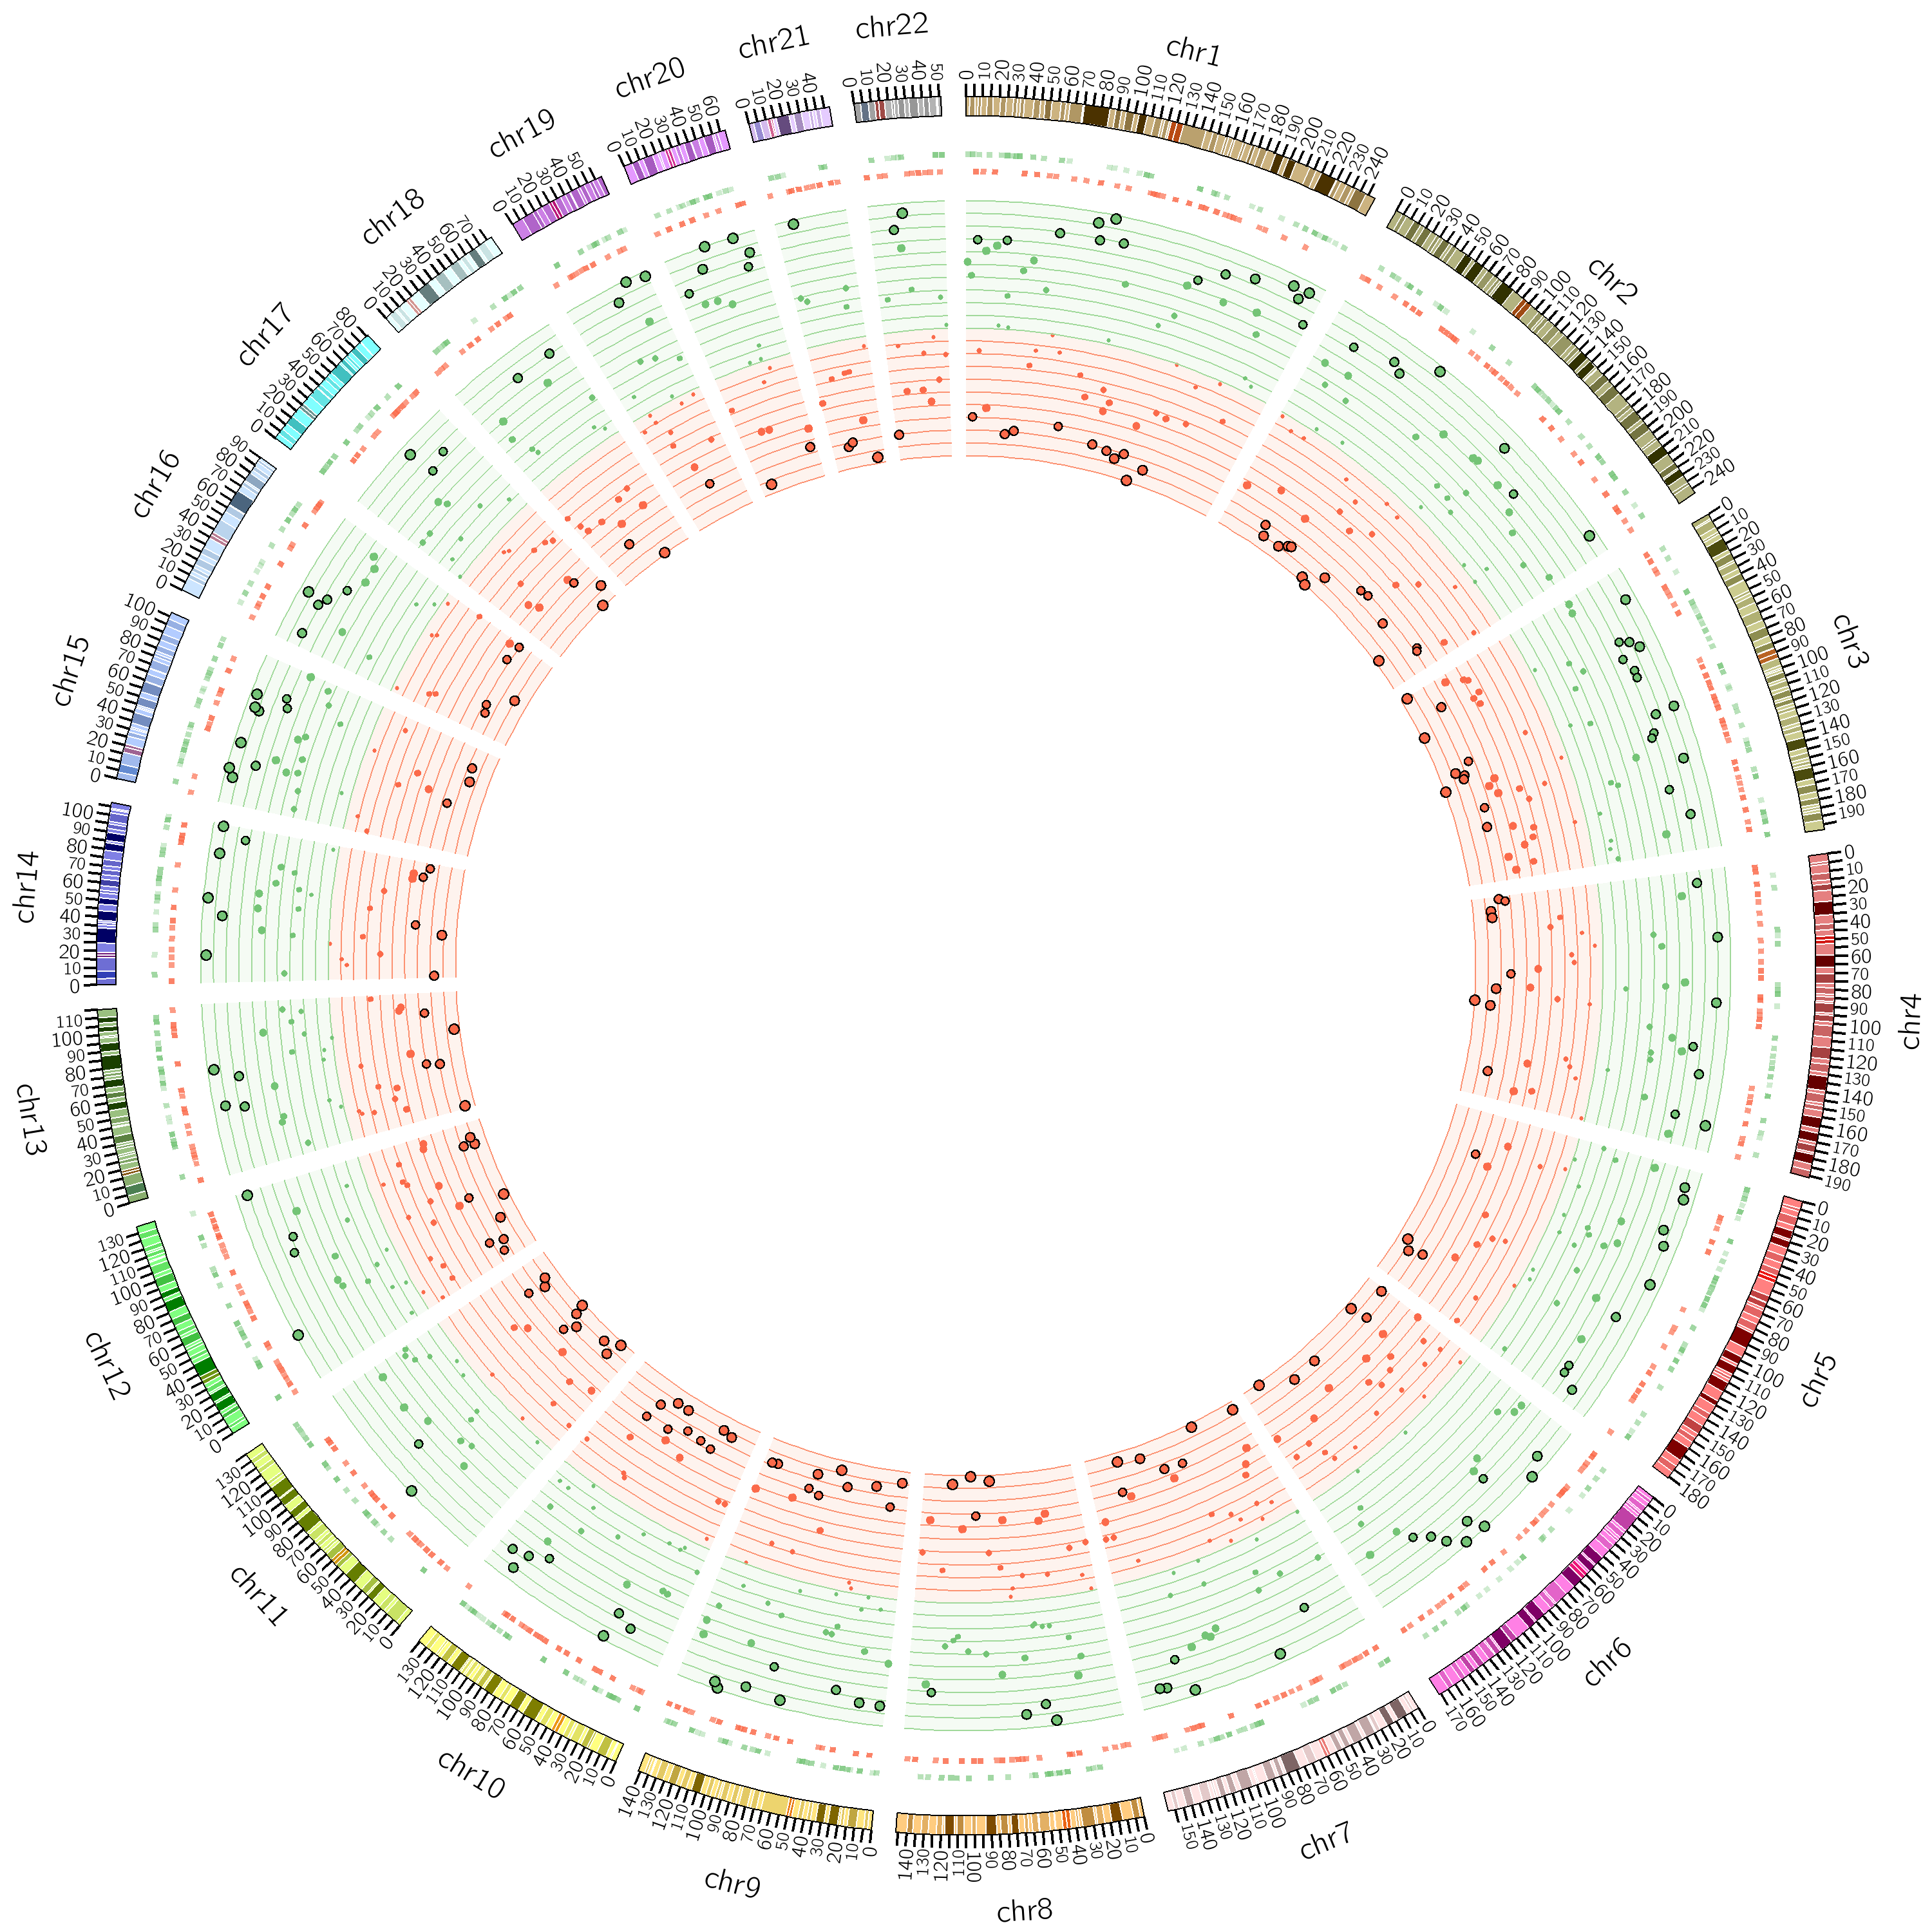

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part14.ipynb).

----